### LET'S GROW MORE INTERNSHIP

### NAME: CHARAN SRIDHAR BHOGARAJU

### TASK-1: IRIS CLASSIFICATION

#### Dataset Information
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

### IMPORT MODULES

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import pylab

### LOADING THE DATASET

In [3]:
iris=sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# showing the number of rows and columns in the dataset
iris.shape

(150, 5)

In [7]:
# showing the data type of columns in dataset
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
# last 5 rows of the dataset
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [9]:
# shows the statistical concepts on each column
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# For checking the amount of null values present in each column
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
# Checking the number of value for particular species
iris['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

### PREPROCESSING OF THE DATASET

In [13]:
# check for the null values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

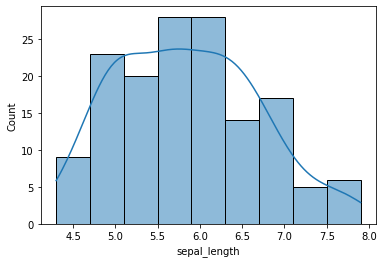

In [18]:
sns.histplot(x='sepal_length',data=iris,kde=True)

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

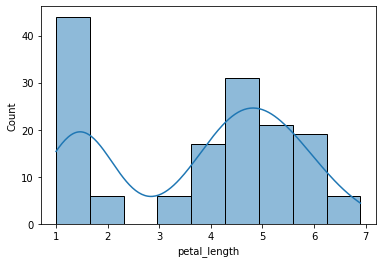

In [19]:
sns.histplot(x='petal_length',data=iris,kde=True)

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

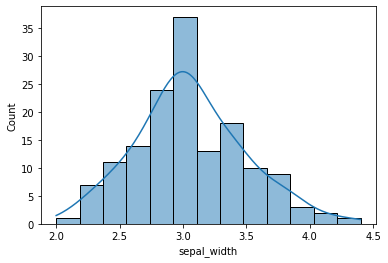

In [20]:
sns.histplot(x='sepal_width',data=iris,kde=True)

<AxesSubplot:xlabel='petal_width', ylabel='Count'>

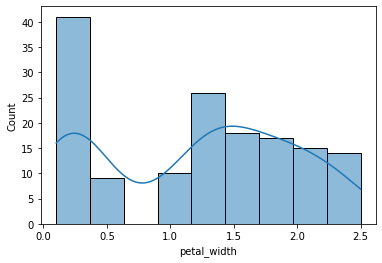

In [21]:
sns.histplot(x='petal_width',data=iris,kde=True)

In [29]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.distplot(df[feature])
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


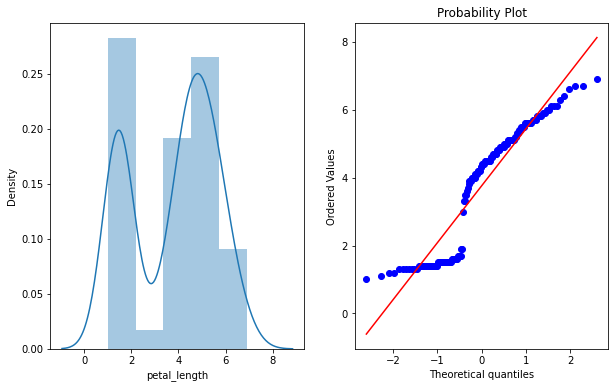

In [32]:
plot_data(iris,'petal_length')

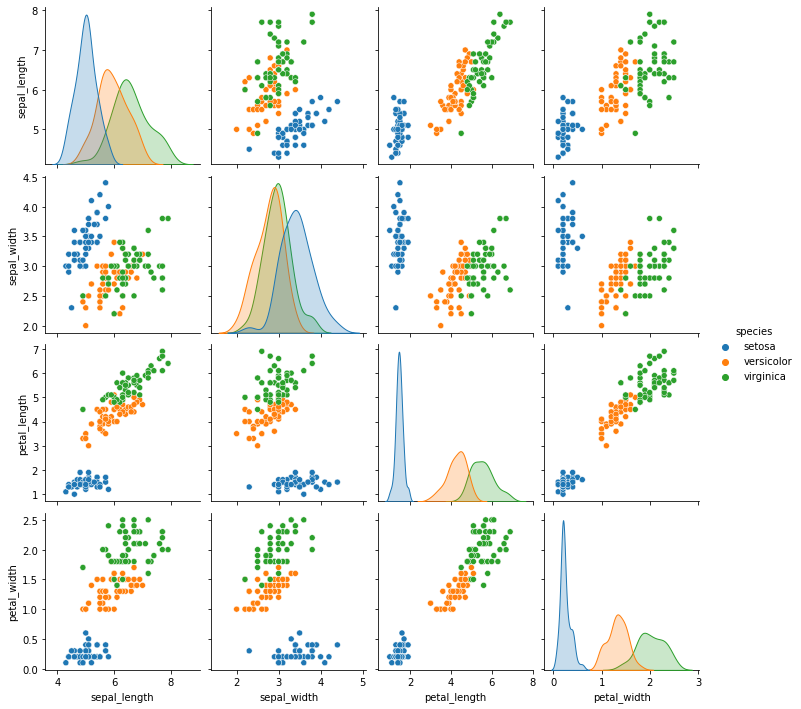

In [41]:
sns.pairplot(iris,hue="species")

### COORELATION MATRIX

In [42]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

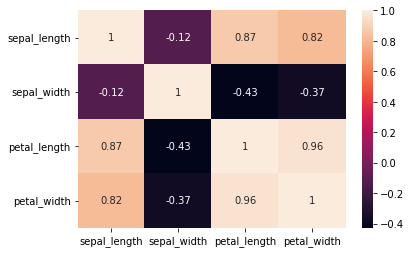

In [46]:
sns.heatmap(iris.corr(),annot=True)

### LABEL ENCODER

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [51]:
iris['species']=le.fit_transform(iris['species'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### MODEL TRAINING

In [56]:
from sklearn.model_selection import train_test_split
# train=70
# test=30
# splitting independent and dependent features
x=iris.iloc[:,0:-1]
y=iris.iloc[:,-1]

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [62]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [63]:
model.fit(x_train,y_train)

LogisticRegression()

In [65]:
print("Accuracy: ",model.score(x_test,y_test)*100,"%")

Accuracy:  97.77777777777777 %


In [66]:
# K NEAREST NEIGHBOURS
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [67]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [68]:
print("Accuracy: ",model.score(x_test,y_test)*100,"%")

Accuracy:  97.77777777777777 %
